In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogscats/"
arch=resnet50
workers=8
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# these variables are used for capturing results
los = []
acc = []

In [3]:
sz=224
bs=64
learnrate = 1e-2 #0.01

In [4]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

 91%|███████████████████████████████████████████████████████████▏     | 328/360 [02:07<00:12,  2.58it/s, loss=0.222]

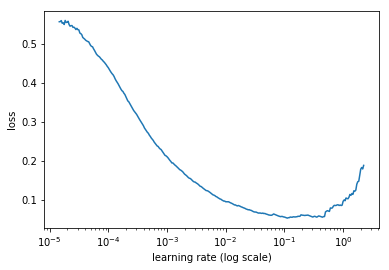

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

 78%|███████████████████████████████████████████████████▏              | 279/360 [01:46<00:31,  2.61it/s, loss=1.62]

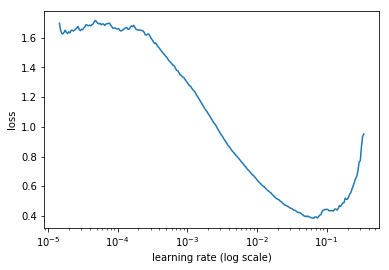

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

In [8]:
sz=224
bs=128
learnrate = 1e-2 #0.01

In [9]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.233492   0.798853   0.9795    


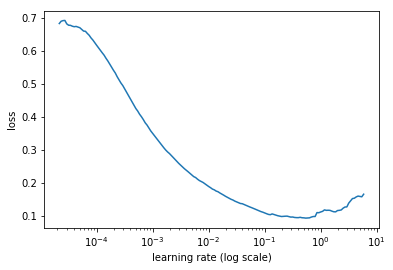

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

 86%|████████████████████████████████████████████████████████▍         | 154/180 [02:02<00:20,  1.26it/s, loss=2.11]

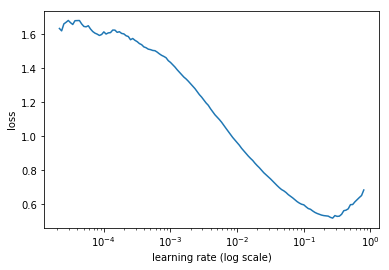

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

In [12]:
for dropout in dropouts:
    learn = ConvLearner.pretrained(arch, data, precompute=False, ps=dropout)
    
    print('Dropout Rate:',dropout)
    %time fit_array = learn.fit(learnrate, 3, cycle_len=1, cycle_mult=2)
    accuracy = fit_array[1]
    loss = fit_array[0][0]
    acc.append(accuracy)
    los.append(loss)

Dropout Rate: 0.0


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.041088   0.030932   0.987     
    1      0.02822    0.030232   0.988                                                                              
    2      0.022174   0.029681   0.9885                                                                             
    3      0.019187   0.03094    0.989                                                                              
    4      0.016256   0.028927   0.9895                                                                             
    5      0.015312   0.030012   0.989                                                                              
    6      0.013703   0.030032   0.99                                                                               
Wall time: 17min 55s
Dropout Rate: 0.1


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.03357    0.029092   0.991     
    1      0.030303   0.024571   0.991                                                                              
    2      0.023095   0.025137   0.9915                                                                             
    3      0.024025   0.027348   0.99                                                                               
    4      0.01932    0.024718   0.991                                                                              
    5      0.020955   0.025361   0.991                                                                              
    6      0.020193   0.027277   0.991                                                                              
Wall time: 17min 44s
Dropout Rate: 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.042943   0.025486   0.99      
    1      0.033058   0.022531   0.992                                                                              
    2      0.026519   0.024484   0.9925                                                                             
    3      0.024252   0.02424    0.989                                                                              
    4      0.023177   0.022367   0.9895                                                                             
    5      0.019165   0.021987   0.991                                                                              
    6      0.019451   0.021693   0.9905                                                                             
Wall time: 17min 44s
Dropout Rate: 0.3


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.044234   0.027183   0.9895    
    1      0.034861   0.023304   0.992                                                                              
    2      0.028294   0.023259   0.9925                                                                             
    3      0.030068   0.023241   0.992                                                                              
    4      0.022846   0.022633   0.992                                                                              
    5      0.025028   0.022178   0.993                                                                              
    6      0.022593   0.023159   0.9915                                                                             
Wall time: 17min 47s
Dropout Rate: 0.4


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.049829   0.023232   0.991     
    1      0.034724   0.021299   0.9915                                                                             
    2      0.026743   0.020427   0.992                                                                              
    3      0.029058   0.021571   0.9915                                                                             
    4      0.025062   0.022339   0.991                                                                              
    5      0.026259   0.022109   0.991                                                                              
    6      0.025316   0.022312   0.9905                                                                             
Wall time: 17min 47s
Dropout Rate: 0.5


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.048822   0.03232    0.989     
    1      0.037415   0.024677   0.99                                                                               
    2      0.032966   0.024826   0.99                                                                               
    3      0.0334     0.02383    0.991                                                                              
    4      0.029153   0.023761   0.992                                                                              
    5      0.028816   0.024411   0.9895                                                                             
    6      0.025667   0.023814   0.99                                                                               
Wall time: 17min 44s
Dropout Rate: 0.6


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.051854   0.028525   0.989     
    1      0.039152   0.024535   0.991                                                                              
    2      0.034434   0.024966   0.991                                                                              
    3      0.036613   0.024661   0.99                                                                               
    4      0.033446   0.024325   0.989                                                                              
    5      0.031206   0.023691   0.9905                                                                             
    6      0.028109   0.023657   0.992                                                                              
Wall time: 17min 46s
Dropout Rate: 0.7


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.058183   0.030894   0.9875    
    1      0.046047   0.023886   0.9895                                                                             
    2      0.043117   0.023419   0.9905                                                                             
    3      0.039401   0.023065   0.99                                                                               
    4      0.043878   0.023113   0.991                                                                              
    5      0.037205   0.023787   0.99                                                                               
    6      0.035758   0.023198   0.9915                                                                             
Wall time: 17min 44s
Dropout Rate: 0.8


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.0777     0.03386    0.988     
    1      0.053325   0.02741    0.9885                                                                             
    2      0.063798   0.026984   0.9885                                                                             
    3      0.052078   0.025985   0.991                                                                              
    4      0.053241   0.02545    0.99                                                                               
    5      0.048668   0.02501    0.9895                                                                             
    6      0.053985   0.025541   0.9905                                                                             
Wall time: 17min 43s
Dropout Rate: 0.9


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.158733   0.038624   0.9865    
    1      0.115515   0.031424   0.987                                                                              
    2      0.095288   0.030752   0.9875                                                                             
    3      0.100522   0.028775   0.9885                                                                             
    4      0.090307   0.0286     0.988                                                                              
    5      0.079999   0.02852    0.988                                                                              
    6      0.079103   0.029168   0.9875                                                                             
Wall time: 17min 42s


In [63]:
print(dropouts)
print(acc)
print(los)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.99, 0.9910000004768371, 0.9905000004768372, 0.9915000009536743, 0.9905000004768372, 0.9900000009536744, 0.9920000004768371, 0.9915000009536743, 0.9905000004768372, 0.9875000009536743]
[0.030031528063118457, 0.027277001835405826, 0.021692775428295136, 0.023159200072288513, 0.02231235682964325, 0.02381373155117035, 0.023656938001513483, 0.023197661831974983, 0.02554148769378662, 0.029168301820755006]


In [4]:
# cheatsheet of results
#acc = [0.99, 0.9910000004768371, 0.9905000004768372, 0.9915000009536743, 0.9905000004768372, 0.9900000009536744, 0.9920000004768371, 0.9915000009536743, 0.9905000004768372, 0.9875000009536743]
#los = [0.030031528063118457, 0.027277001835405826, 0.021692775428295136, 0.023159200072288513, 0.02231235682964325, 0.02381373155117035, 0.023656938001513483, 0.023197661831974983, 0.02554148769378662, 0.029168301820755006]

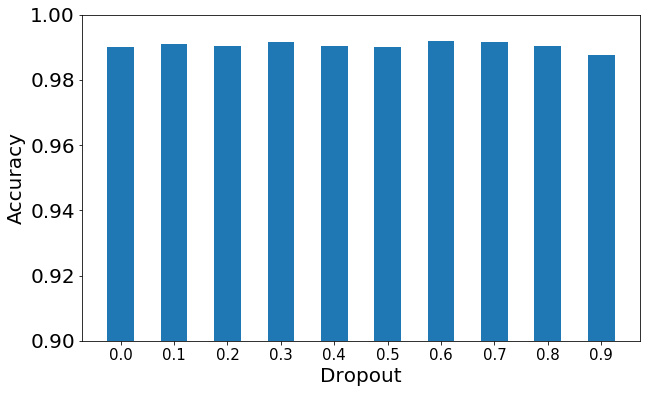

In [8]:
width = 0.05
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set new size (0=width,1=height)
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.bar(dropouts, acc, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
plt.ylim(.9,1)

plt.xlabel('Dropout', size = 20)
plt.ylabel('Accuracy',size = 20)

plt.show()

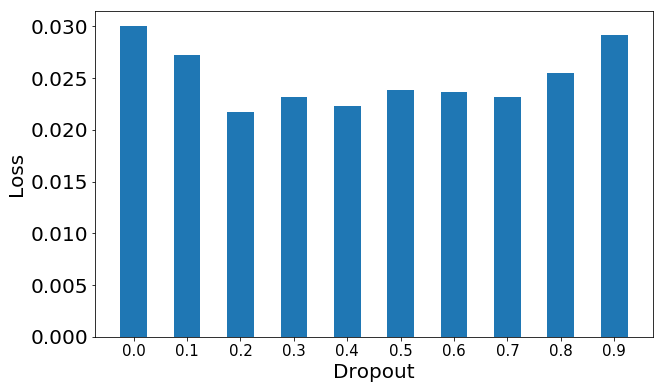

In [9]:
width = 0.05
plt.bar(dropouts, los, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
#plt.gca().invert_yaxis()

plt.xlabel('Dropout', size = 20)
plt.ylabel('Loss',size = 20)

plt.show()